In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

2025-02-17 14:58:23.716694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-17 14:58:23.725556: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-17 14:58:23.728233: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 14:58:24.178980: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[-9.21034037 -8.51719319 -7.82404601 -7.13089883 -6.43775165 -5.74460447
 -5.05145729 -4.35831011 -3.66516293 -2.97201575]
[0.00010000000000000009, 0.00019999999999999985, 0.0004000000000000001, 0.0008000000000000003, 0.0016000000000000005, 0.0032000000000000015, 0.006399999999999998, 0.012799999999999997, 0.025599999999999994, 0.051199999999999996]


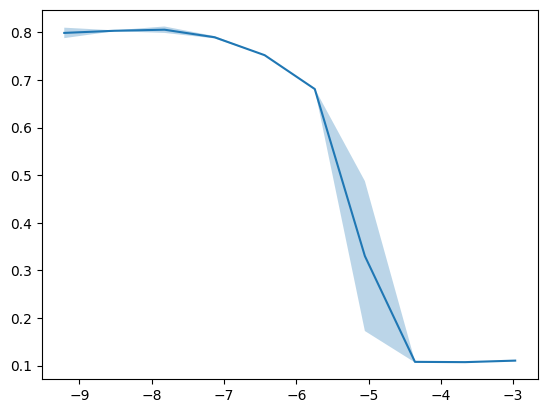

In [ ]:


x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/adam_wobn/noreg"),
                               lambda subpath: np.log(float(subpath)),lambda p : max_acc(get_stats(p,"test_stats")),plt, norm=False,label="noreg")


In [ ]:
"""
writer = write(name="a_wobn",path="../../run/adam_wobn",h=12,max_tasks=20)
start_lr = 0.0001
import json
for i in range(1,6):
    with open("../../data/adam_wobn/noreg/0.0001/settings.json", "r") as f:
        js = json.load(f)

    js["at_step"] = 0
    js["save_path"] = 0
    js["num_steps"] = 200000
    js["save_args"]["save_states_every"] = 200000
    lr = start_lr/(2**i)
    js["optimizer"]["lr"] = lr

    os.makedirs(f"../../data/adam_wobn/noreg/{str(round(lr,8))}",exist_ok=True)
    with open(f"../../data/adam_wobn/noreg/{str(round(lr,8))}/settings.json","w") as f:
        json.dump(js,f,indent=4)

    writer.write(f"python code/main.py ./data/adam_wobn/noreg/{str(round(lr,8))}/ --reset \n")
"""

5e-05
2.5e-05
1.25e-05
6.25e-06
3.13e-06


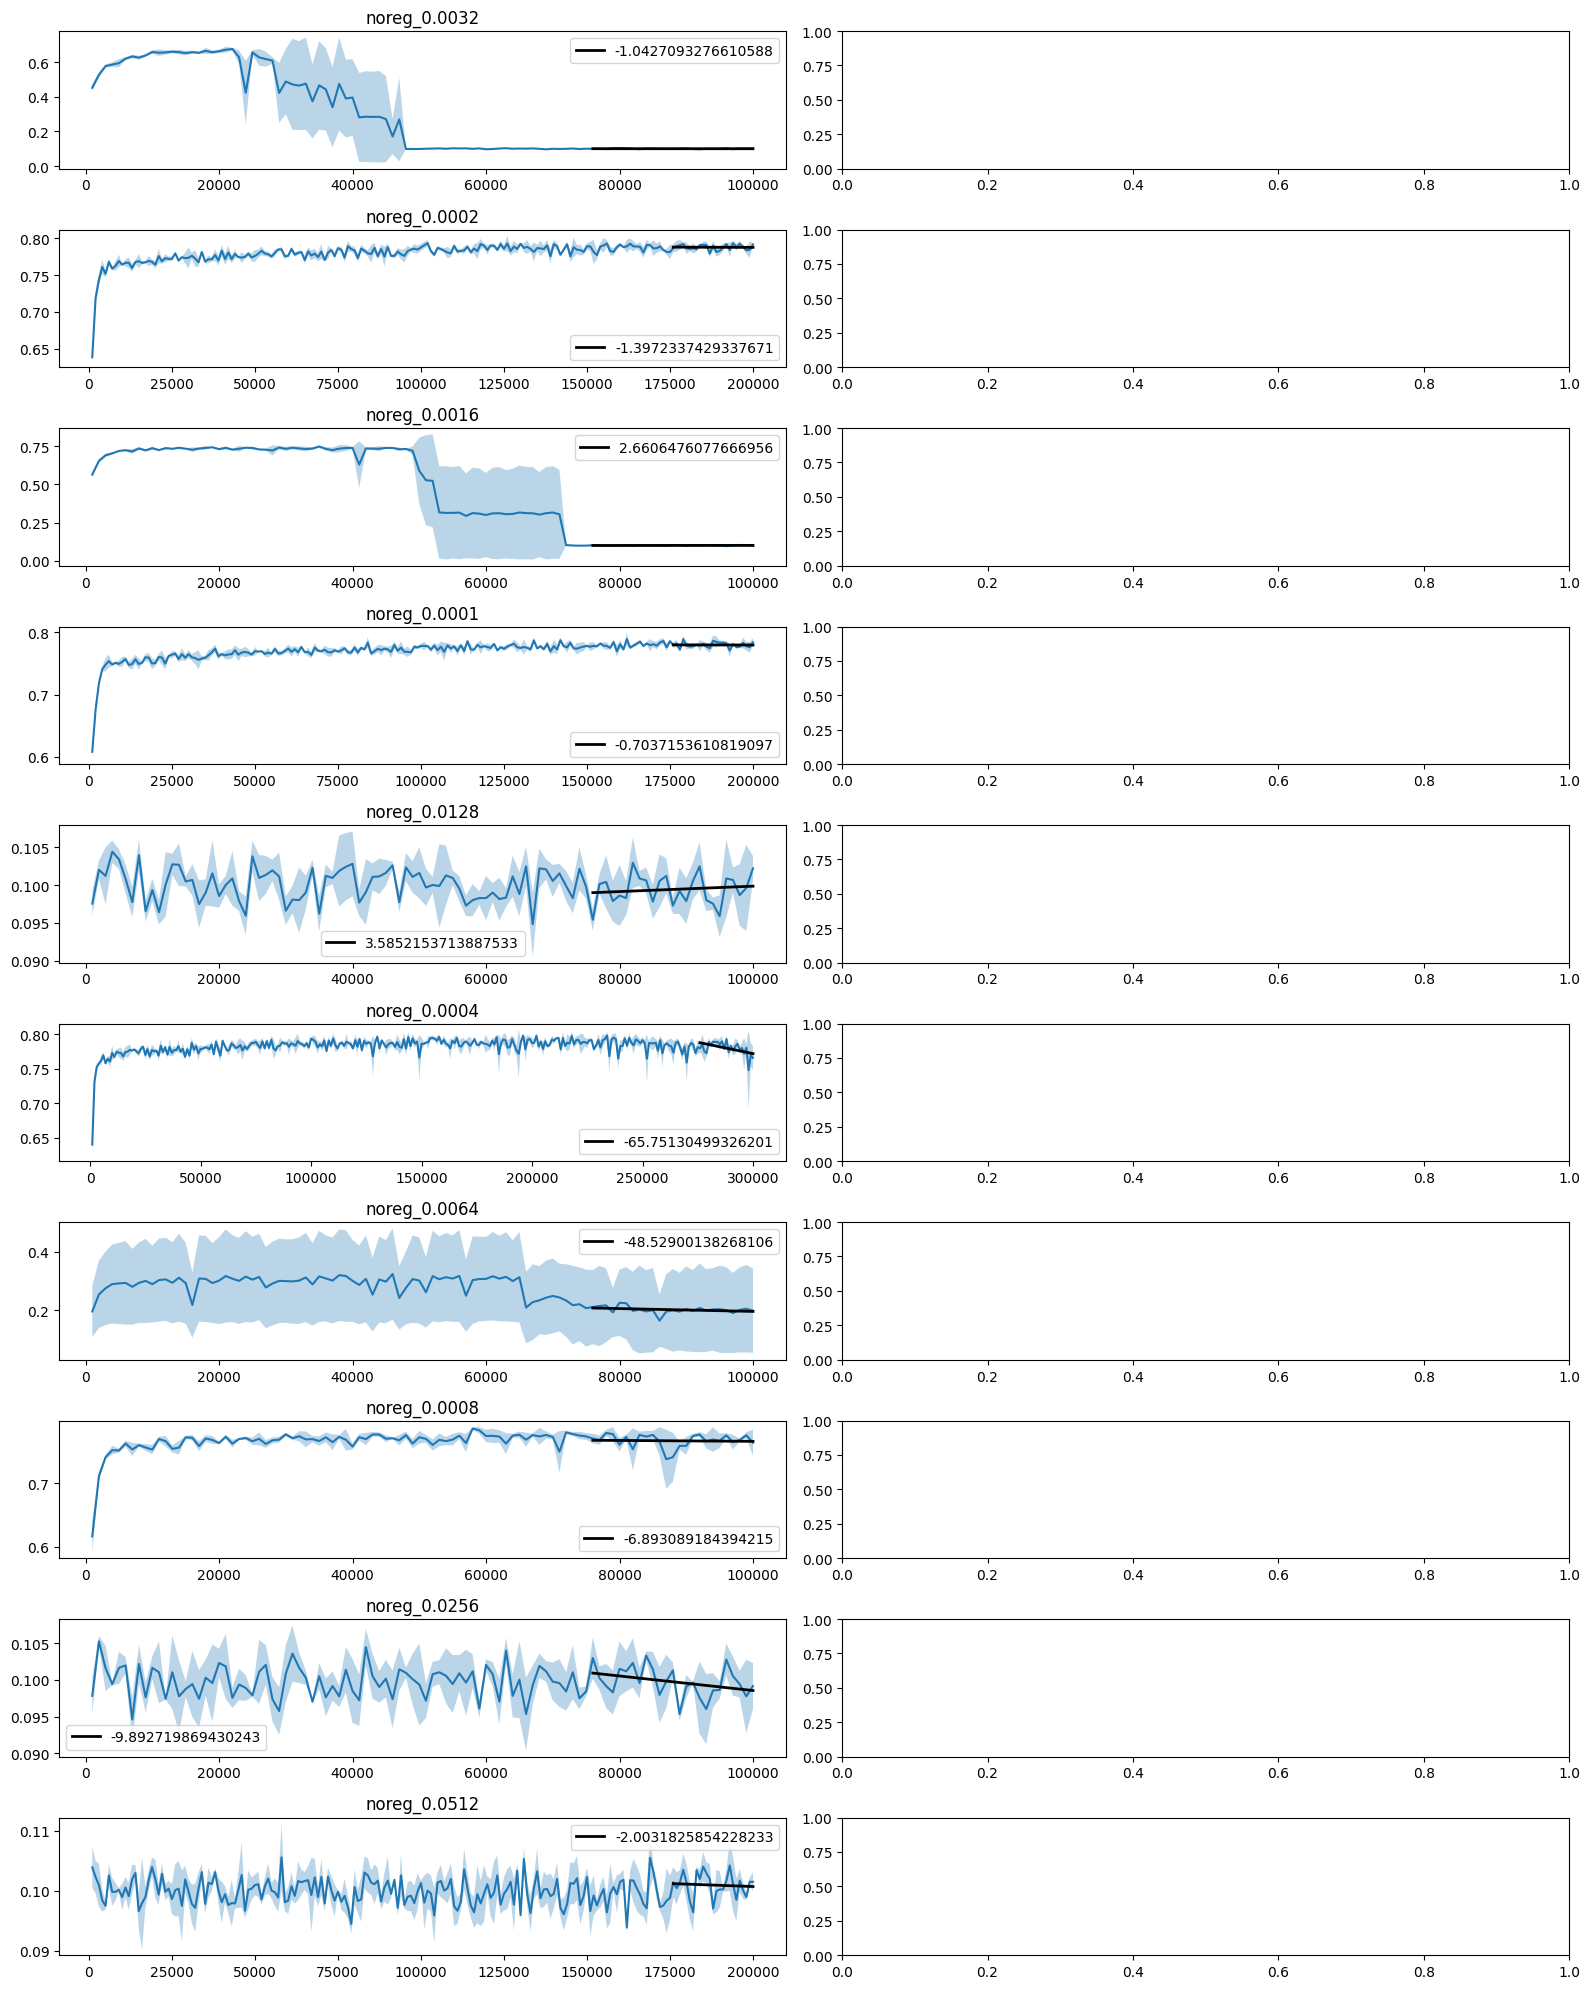

In [3]:
writer = write(name="a_wobn",path="../../run/adam_wobn",h=12,max_tasks=20)

fig,axs = plt.subplots(nrows=10,ncols=2)
cur_col = 0
setting = "adam_wobn"
for exp in os.listdir(f"../../data/{setting}"):

    if os.path.exists(os.path.join(f"../../data/{setting}",exp,"settings.json")):
        continue

    hyperparams = list(os.listdir(os.path.join(f"../../data/{setting}",exp)))

    for row,hyperparam in enumerate(hyperparams):
        if not os.path.exists(os.path.join(f"../../data/{setting}",exp,hyperparam,"test_stats")):
            axs[row][cur_col].set_title(exp + "_" + hyperparam)
            continue
        path = os.path.join(f"../../data/{setting}",exp,hyperparam)
        stats = get_stats(path,"test_stats")
        last_vals = np.mean(np.stack(list(stats["acc"].values())[-25:],axis=0),axis=-1)
        last_keys = np.asanyarray(list(stats["acc"].keys())[-25:])
        m,b = np.polyfit(last_keys, last_vals, 1)
        plot_step_stat(stats["acc"],axs[row][cur_col])
        axs[row][cur_col].set_title(exp + "_" + hyperparam)
        axs[row][cur_col].plot([last_keys[0],last_keys[-1]],[m*last_keys[0] + b,m*last_keys[-1]+ b],lw=2,color="black",label=str(m*1e8))
        axs[row][cur_col].legend()

        if m*1e8>4:
            import json
            with open(os.path.join(f"../../data/{setting}",exp,hyperparam,"settings.json"),"r") as f:
                js = json.load(f)
            curr_steps = js["num_steps"]
            save_states = js["save_args"]["save_states_every"]
            writer.write(f"python code/main.py {os.path.join("./data",setting,exp,hyperparam)}/ --overwrite-num-steps {curr_steps + 100000} --overwrite-save-state {curr_steps + 100000} --overwrite-save-grad {-1} \n")

    cur_col += 1
    if cur_col >= 2:
        fig.set_size_inches(16,20)
        fig.tight_layout()
        plt.show()
        plt.clf()
        plt.cla()
        fig,axs = plt.subplots(nrows=25,ncols=4)
        cur_col = 0

fig.set_size_inches(16,20)
fig.tight_layout()
plt.show()

